# Teste de requisição da API
## O objetivo desse teste é verificar se a API está funcionando corretamente.
- Serão feitos teste de requisição POST para dados individuais e em massa.
- O teste será feito com o uso da biblioteca `aiohttp` para requisições assíncronas.

In [79]:
import aiohttp
import asyncio
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import nest_asyncio

from typing import List, Dict

# Aplicar nest_asyncio para funcionar no Jupyter
nest_asyncio.apply()

## Carregando o arquivo bruto da base de teste e a URL da API


- Dados para teste

In [ ]:
arquivo = 'output/X_test_save.csv'

- A API foi desenvolvida em FastAPI e esta sendo aplicada em ambiente local usando imagem docker.
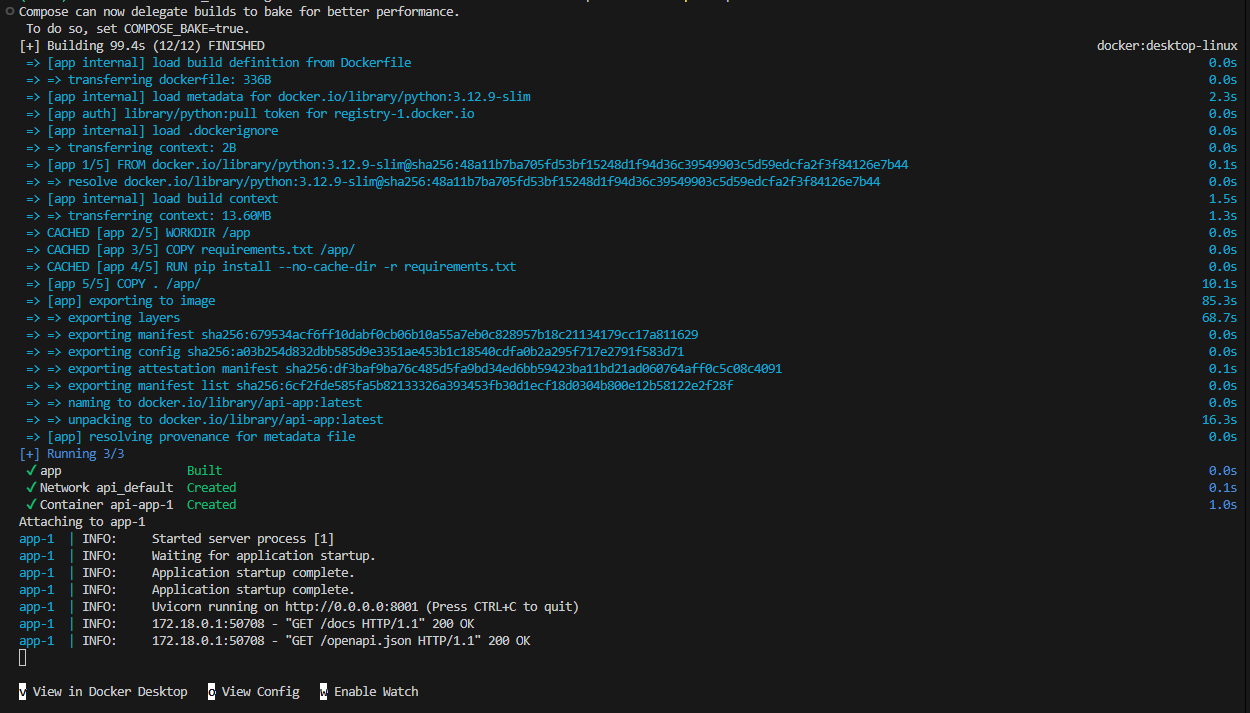

In [103]:
async with aiohttp.ClientSession() as session:
	async with session.get('http://127.0.0.1:8001') as response:
		resultados = await response.json()

resultados

{'status': 'healthy',
 'message': 'API do Modelo de Classificação Olist E-Commerce',
 'model_type': 'RandomForestClassifier',
 'scaler_type': 'StandardScaler'}

In [104]:

urlApi = 'http://127.0.0.1:8001/predict'


### Tratando o arquivo da base de teste em JSON

In [3]:
# Carregar e preparar os dados
df_teste = pd.read_csv(arquivo)
df_teste = df_teste.replace({np.nan: None})
data = json.loads(df_teste.to_json(orient='records'))


In [4]:
df_teste.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,1b307ea4f5d5bdc7289afe051242dc2f,64371168bfc7897e0e911783d3de0a3c,delivered,2018-04-11 13:34:57,2018-04-11 13:50:43,2018-04-11 22:38:31,2018-04-13 15:26:53,2018-04-26 00:00:00,4267ae10da6a0ab3c691fc736a3be5a0,4,...,None,None,None,450.0,20.0,12.0,15.0,7133,guarulhos,SP
1,e70b63c3816d07ca01fe09b627e7d85c,0b9e99e458210e5c7417a8bd7166ad48,delivered,2018-06-06 11:01:55,2018-06-07 11:15:45,2018-06-07 15:56:00,2018-06-25 19:04:25,2018-07-23 00:00:00,b116d90aea0ea524cf71ed6931254974,5,...,51.0,625.0,1.0,900.0,25.0,12.0,38.0,80310,curitiba,PR
2,9a61dea33159894a2e383b2b3d520158,ae9337f44dd7350c1989e6dcd9802452,delivered,2018-03-30 05:20:13,2018-03-30 06:30:09,2018-04-03 01:52:45,2018-04-13 22:32:48,2018-04-24 00:00:00,ec83d31852d60f822db12245cf4a9eb9,5,...,60.0,369.0,6.0,150.0,16.0,9.0,11.0,35700,sete lagoas,MG
3,a5375fe8e7f2960019edf0fff68c58fb,793cedb8195559c0baac76414a3fd0de,delivered,2018-07-05 10:05:41,2018-07-06 02:51:09,2018-07-06 11:15:00,2018-07-10 18:59:45,2018-07-31 00:00:00,1a9ff0355772642d15290d278ea69ac3,5,...,51.0,1438.0,6.0,280.0,17.0,6.0,11.0,35501,divinopolis,MG
4,190c71c36bb25e9a85f3a53291e475a3,5d2b9a7a9bdbe47b86f680434ea11930,delivered,2017-05-22 19:33:26,2017-05-22 19:45:12,2017-05-23 10:19:31,2017-05-25 10:29:35,2017-06-02 00:00:00,4371f9996c12284456e5b65e6733fcfa,3,...,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,3426,sao paulo,SP


In [299]:
data[1]

{'order_id': 'e70b63c3816d07ca01fe09b627e7d85c',
 'customer_id': '0b9e99e458210e5c7417a8bd7166ad48',
 'order_status': 'delivered',
 'order_purchase_timestamp': '2018-06-06 11:01:55',
 'order_approved_at': '2018-06-07 11:15:45',
 'order_delivered_carrier_date': '2018-06-07 15:56:00',
 'order_delivered_customer_date': '2018-06-25 19:04:25',
 'order_estimated_delivery_date': '2018-07-23 00:00:00',
 'review_id': 'b116d90aea0ea524cf71ed6931254974',
 'review_score': 5,
 'review_comment_title': None,
 'review_comment_message': None,
 'review_creation_date': '2018-06-26 00:00:00',
 'review_answer_timestamp': '2018-06-28 14:27:33',
 'payment_sequential': 1,
 'payment_type': 'credit_card',
 'payment_installments': 3,
 'payment_value': 395.58,
 'customer_unique_id': '82bdf2f11f9a5bf5af0801a168fe5c4d',
 'customer_zip_code_prefix': 49010,
 'customer_city': 'aracaju',
 'customer_state': 'SE',
 'order_item_id': 1,
 'product_id': '6cdd53843498f92890544667809f1595',
 'seller_id': 'ccc4bbb5f32a6ab2b7066

## Funções para as requisições

### Função principal que faz as requisições


In [92]:
async def consultar_lote(session, lote):
    """Função para consultar um lote de registros"""
    resultados = []
    for registro in lote:
        try:
            async with session.post(urlApi, json=registro) as response:
                resultado = await response.json()
                resultados.append(resultado)
        except Exception as e:
            print(f"Erro ao processar registro: {e}")
            resultados.append({"error": str(e)})
    return resultados

### Consulta individual ou customizada
- A consulta irá tratar a base de dados por completo podendo enviar 1 ou mais dados de uma vez.


In [93]:
async def processar_dados(df):
    async with aiohttp.ClientSession() as session:
        resultados = await consultar_lote(session, df)
    return resultados


### Consulta em massa e em lotes
- A consulta em massa irá tratar a base de dados separando em lotes customizados e fazendo as requisições de forma assincrona.

In [94]:
async def processar_dados_em_lotes(df,lote:int = 200):
    """Função principal para processar todos os lotes"""
    tamanho_lote = lote
    total_registros = len(df)
    
    async with aiohttp.ClientSession() as session:
        resultados_totais = []
        
        # Criar barra de progresso
        with tqdm(total=total_registros, desc="Processando registros") as pbar:
            for i in range(0, total_registros, tamanho_lote):
                # Pegar o próximo lote
                lote_atual = df[i:i + tamanho_lote]
                
                # Processar o lote
                resultados_lote = await consultar_lote(session, lote_atual)
                resultados_totais.extend(resultados_lote)
                
                # Atualizar a barra de progresso
                pbar.update(len(lote_atual))
                
                # Exibir informações do lote
                print(f"\nLote {i//tamanho_lote + 1} processado: {len(lote_atual)} registros")
        
        return resultados_totais

- Consulta de lotes em paralelo

In [95]:
class ProcessadorParalelo:
    def __init__(self, url_api: str, max_concurrent: int = 10):
        self.url_api = url_api
        self.semaphore = asyncio.Semaphore(max_concurrent)
        
    async def processar_registro(self, session: aiohttp.ClientSession, registro: Dict) -> Dict:
        async with self.semaphore:
            try:
                async with session.post(self.url_api, json=registro) as response:
                    return await response.json()
            except Exception as e:
                return {"error": str(e)}

    async def processar_lote(self, dados: List[Dict], tamanho_lote: int = 100) -> List[Dict]:
        connector = aiohttp.TCPConnector(limit=60)
        async with aiohttp.ClientSession(connector=connector) as session:
            tarefas = []
            resultados = []
            
            # Processa em lotes para não sobrecarregar a memória
            for i in range(0, len(dados), tamanho_lote):
                lote = dados[i:i + tamanho_lote]
                tarefas = [self.processar_registro(session, registro) for registro in lote]
                resultados_lote = await asyncio.gather(*tarefas)
                resultados.extend(resultados_lote)
                
                # Exibe progresso
                print(f"Processados: {len(resultados)}/{len(dados)}")
                
            return resultados

async def processar_dados_paralelo(dados: List[Dict], url_api: str = urlApi) -> pd.DataFrame:   
    processador = ProcessadorParalelo(url_api)
    resultados = await processador.processar_lote(dados)
    
    # Criar DataFrame com resultados
    df = pd.DataFrame([{
        'predicao': r.get('prediction_label', 'Erro')
    } for r in resultados])
    
    print("\nResultados:")
    print(df['predicao'].value_counts())
    
    return df


## ETAPA DE TESTES

### Fazendo um teste de requisição individual

In [96]:
resultado = await processar_dados(data[0:1])
resultado

[{'prediction': 1, 'prediction_label': 'Satisfeito'}]

O retorno da Api traz dados como:
```python
{'prediction': 1, #informa o resultado da classificação 0 ou 1
 'prediction_label': 'Satisfeito' #informa o resultado da classificação Satisfeito ou Insatisfeito
 }
```


### Fazendo um teste de requisição de um dataset customizado

In [97]:
resultado = await processar_dados(data[0:5])
resultado

[{'prediction': 1, 'prediction_label': 'Satisfeito'},
 {'prediction': 1, 'prediction_label': 'Satisfeito'},
 {'prediction': 1, 'prediction_label': 'Satisfeito'},
 {'prediction': 1, 'prediction_label': 'Satisfeito'},
 {'prediction': 0, 'prediction_label': 'Insatisfeito'}]

In [98]:
for resul in resultado:
    print(resul['prediction_label'])

Satisfeito
Satisfeito
Satisfeito
Satisfeito
Insatisfeito


### Fazendo a requisição em massa e em lotes

In [87]:
n=100
# Executar o processamento
print(f"Iniciando processamento de {len(data[:500])} registros em lotes {n}...")
resultados = await processar_dados_em_lotes(data[:500],lote=n)
print(f"\nProcessamento concluído! Total de resultados: {len(resultados)}")

Iniciando processamento de 500 registros em lotes 100...


Processando registros:  20%|██        | 100/500 [00:16<01:07,  5.94it/s]


Lote 1 processado: 100 registros


Processando registros:  40%|████      | 200/500 [00:33<00:49,  6.04it/s]


Lote 2 processado: 100 registros


Processando registros:  60%|██████    | 300/500 [00:50<00:33,  6.00it/s]


Lote 3 processado: 100 registros


Processando registros:  80%|████████  | 400/500 [01:06<00:16,  6.02it/s]


Lote 4 processado: 100 registros


Processando registros: 100%|██████████| 500/500 [01:23<00:00,  6.02it/s]


Lote 5 processado: 100 registros

Processamento concluído! Total de resultados: 500


### Fazendo a requisição em massa e em lotes em paralelo

In [99]:
resultados = await processar_dados_paralelo(data[:500])

Processados: 100/500
Processados: 200/500
Processados: 300/500
Processados: 400/500
Processados: 500/500

Resultados:
predicao
Satisfeito      413
Insatisfeito     87
Name: count, dtype: int64


In [100]:
resultados

,predicao
0,Satisfeito
1,Satisfeito
2,Satisfeito
3,Satisfeito
4,Insatisfeito
...,...
495,Satisfeito
496,Insatisfeito
497,Satisfeito
498,Satisfeito
